# Imports

In [54]:
import pandas as pd
pd.set_option('max_colwidth', 150)
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [55]:
DATA_PATH_PREP = '../DATA/prepared'

# Load data

In [56]:
df_full = pd.read_pickle(f'{DATA_PATH_PREP}/02_df_full_text_no_meta.pkl')
df_full.head()

,author,title,download_link,local_filename,text
0,ivan_vazov,Чичовци,https://chitanka.info/text/3757-chichovtsi.txt.zip,../DATA/original/ivan_vazov_tbc_chichovtsi.txt,\n\tГалерия от типове и нрави български в турско време\n\n\n\tI. Общество\n\n\tУтринното лятно слънце изскокна високо над Стара планина. Потоци от...
1,ivan_vazov,Под игото,https://chitanka.info/text/3753-pod-igoto.txt.zip,../DATA/original/ivan_vazov_tbc_pod_igoto.txt,"\n\n\n\tЧаст първа\n\n\tI. Гост\n\n\tТая прохладна майска вечер чорбаджи Марко, гологлав, по халат, вечеряше с челядта си на двора.\n\tГосподарска..."
2,ivan_vazov,Българският език,https://chitanka.info/text/5189-bylgarskijat-ezik.txt.zip,../DATA/original/ivan_vazov_bylgarskijat_ezik.txt,"\n\n\n\n\tЕзик свещен на моите деди\n\tезик на мъки, стонове вековни,\n\tезик на тая, дето ни роди\n\tза радост не — за ядове отровни.\n\n\tЕзик п..."
3,ivan_vazov,Кочо,https://chitanka.info/text/3851-kocho.txt.zip,../DATA/original/ivan_vazov_kocho.txt,"\n\tЗащитата на Перущица\n\n\n\tO, движенье славно, о, мрачно движенье,\n\tдни на борба горда, о, дни на паденье!\n\tЕпопея тъмна, непозната нам,\..."
4,ivan_vazov,Левски,https://chitanka.info/text/3849-levski.txt.zip,../DATA/original/ivan_vazov_levski.txt,"\n\n\n\tМанастирът тесен за мойта душа е.\n\tКога човек дойде тук да се покае,\n\tтрябва да забрави греховния мир,\n\tда бяга съблазни и да търси ..."


In [57]:
df_full_soft = pd.read_pickle(f'{DATA_PATH_PREP}/03_df_full_soft.pkl')
df_full_med = pd.read_pickle(f'{DATA_PATH_PREP}/03_df_full_med.pkl')
df_full_hard = pd.read_pickle(f'{DATA_PATH_PREP}/03_df_full_hard.pkl')
df_full_med.head()

,text,author
0,"[сия, неин, —, злато, с, шепа, ,, моля, ти, се, ., късмет, ли, да, то, нарека, ,, какъв, да, то, нарека, —, не, знайм, !, па, взема, и, дете, неин...",aleko-konstantinov
1,"[сега, не, си, раз, сега не, не си, си раз, сега не си, не си раз, сега не си раз]",aleko-konstantinov
2,"[аз, какъв, да, правя, ., —, как, какъв, да, правя, !, правя, какъвто, правя, хора, :, свий, си, опашка, ,, па, си, налягам, парцал, …, какъв, се,...",aleko-konstantinov
3,"[а, ,, че, не, съчувствувам, на, македонец, …, (, я, туря, две, -, трия, дърво, в, печка, ., стига, ., ), нямам, си, хас, ,, джанъм, ,, този, бико...",aleko-konstantinov
4,"[швам, ), …, знача, ,, и, да, се, разгатна, енигма, на, зелен, сукно, с, металически, копче, ,, и, пламък, на, петрол, в, нощен, тъмнина, ,, и, уж...",aleko-konstantinov


# Group to get whole text

In [58]:
df_group_by_author_raw = df_full.groupby("author")["text"].agg(" ".join).reset_index()
df_group_by_author_raw

,author,text
0,aleko-konstantinov,"\n\n\n\tНашият помощник на регистратора е страшен комик. Изпокапваме от смях, когато почне да бомбардира несправедливата съдба.\n\t— Е, дявол да г..."
1,dimityr-dimov,"\n\n\n\tI глава\n\n\tГроздоберът беше към края си.\n\tОт малките вили и кирпичените постройки сред лозята се разнасяха ту задружни песни, бързи и ..."
2,dimityr-talev,"\n\n\n\tПърва част\n\tХаджи Серафимовата внука\n\n\n\n\tОвде дърво столовито,\n\tстоловито, грановито,\n\tгранки му са до небеси,\n\tа корени — су..."
3,elin-pelin,"\n\n\n\tПърва глава\n\n\tНай-заможният човек в селото беше дядо Йордан Геракът. Пъргав и трудолюбив, той бе работил през целия си живот и бе сполу..."
4,ivan_vazov,\n\tГалерия от типове и нрави български в турско време\n\n\n\tI. Общество\n\n\tУтринното лятно слънце изскокна високо над Стара планина. Потоци от...
5,jordan-jovkov,"\n\n\n\tI\n\n\tГрадът бързо се подновяваше и растеше. Но все пак оставаха много улици, където още можеше да се видят тихи, едновремешни къщурки, с..."


In [59]:
df_group_by_author_soft = df_full_soft.groupby("author").sum()
df_group_by_author_soft['text'] = df_group_by_author_soft['text'].map(' '.join)
df_group_by_author_soft

,text
author,
aleko-konstantinov,"сията й — злато с шепа , моля ти се . късмет ли да го наречеш , какво да го наречеш — не знайш ! па вземи и децата й : по - голямото , не го ли зн..."
dimityr-dimov,"тук - таме в някое лозе имаше още хора , които се забавляваха с песни , акордеони и китари . по шосето пристъпваха коне , натоварени тежко с после..."
dimityr-talev,"й , взел ги е „ на нишан “ , както си вървели по пътя . ай , господи ! — ще бегам — и стоян пак погледна кучето , — ще бегам в града ! болките по ..."
elin-pelin,"ели и гласът му трепереше , но лице , с брада на светец , сплъстена и бяла като косата ели и и гласът гласът му му трепереше трепереше , , но но л..."
ivan_vazov,"чо йотата . прочее селямсъзът беше много приказлив человек . случеше ли се някой да го попита отде има емфената си кутийка , която освен на емфе м..."
jordan-jovkov,"ически изчисления и чертежи , младият инженер не беше чужд на литературата и изкуството . вярно е , че кой знай защо най - великият поет за него о..."


In [60]:
df_group_by_author_med = df_full_med.groupby("author").sum()
df_group_by_author_med['text'] = df_group_by_author_med['text'].map(' '.join)
df_group_by_author_med

,text
author,
aleko-konstantinov,"сия неин — злато с шепа , моля ти се . късмет ли да то нарека , какъв да то нарека — не знайм ! па взема и дете неин : по - голям , не то ли зная ..."
dimityr-dimov,"тук - там в някой лозе имам още хор , който се забавлявам с песен , акордеоня и китар . по шосе пристъпвам кон , натоварен тежко с последен кош гр..."
dimityr-talev,"неин , взема те е „ на нишан “ , както си вървя по път . ай , господи ! — ще бегам — и стоян пак погледна куче , — ще бегам в град ! болка по ръце..."
elin-pelin,"ел и глас негов треперя , но лице , с брада на светец , сплъстена и бял като коса ел и и глас глас негов негов треперя треперя , , но но лице лице..."
ivan_vazov,"чо йота . прочее селямсъз съм много приказлив человек . случа ли се някой да то попитам отде имам емфен си кутийка , който освен на емфе мириша ощ..."
jordan-jovkov,"ически изчисля и чертежа , млад инженер не съм чужд на литература и изкуство . вярно е , че кой знам защо най - велик поет за нега от всички време..."


In [61]:
df_group_by_author_hard = df_full_hard.groupby("author").sum()
df_group_by_author_hard['text'] = df_group_by_author_hard['text'].map(' '.join)
df_group_by_author_hard

,text
author,
aleko-konstantinov,сия злато шепа късмет наре наре знайм па взема дете погол зная голобрад таквоз никак хлапя взема натрап булк разбира знам изл късмет донес щасти г...
dimityr-dimov,тукта няко лозе има хор забавлява песен акордеон китар шосе пристъпва кон натовар тежк послед кош грозд храст свиря щурчин заек изскоч отнякъд хук...
dimityr-talev,взема върв път ай господ бега стоян поглед куче бега град болк ръцет взема върв върв път път ай ай господ господ бега бега стоян стоян поглед погл...
elin-pelin,ел глас трепер лице брада светец сплъст бял коса ел глас глас трепер трепер лице лице брада брада светец светец сплъст сплъст бял бял коса ел глас...
ivan_vazov,чо йота прочее селямсъз приказлив челове случа попита отде емфен кутийк емфе мири дълбо древност захваща разказва оста наследств баща ива подаръ н...
jordan-jovkov,ическ изчисл чертеж млад инженер чужд литератур изкуств вярн знам найвели поет време леопард негов мрачен меланхолич поези показва голя слабост не...


# Word Clouds!

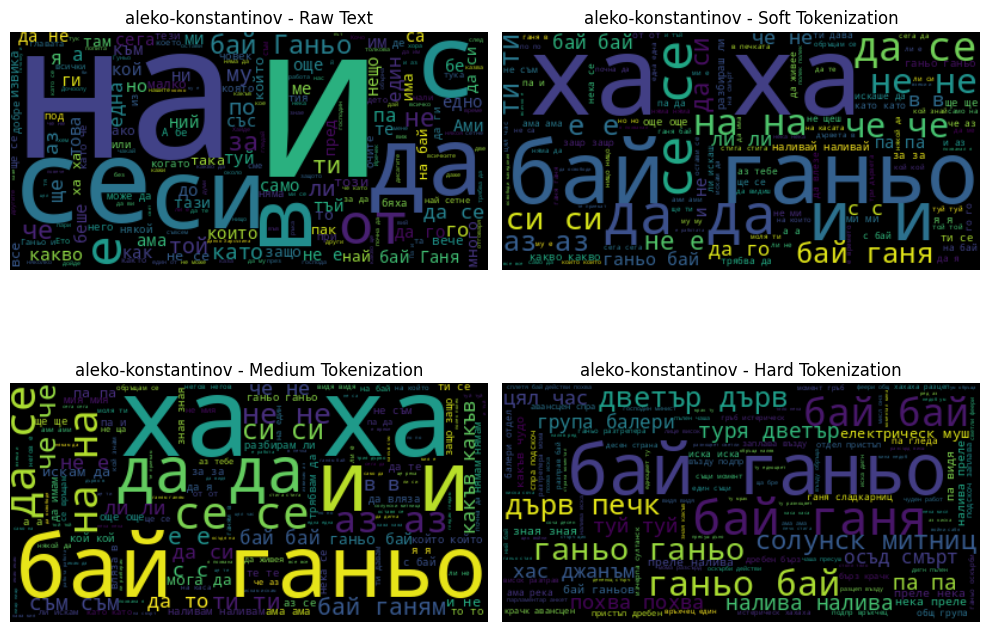

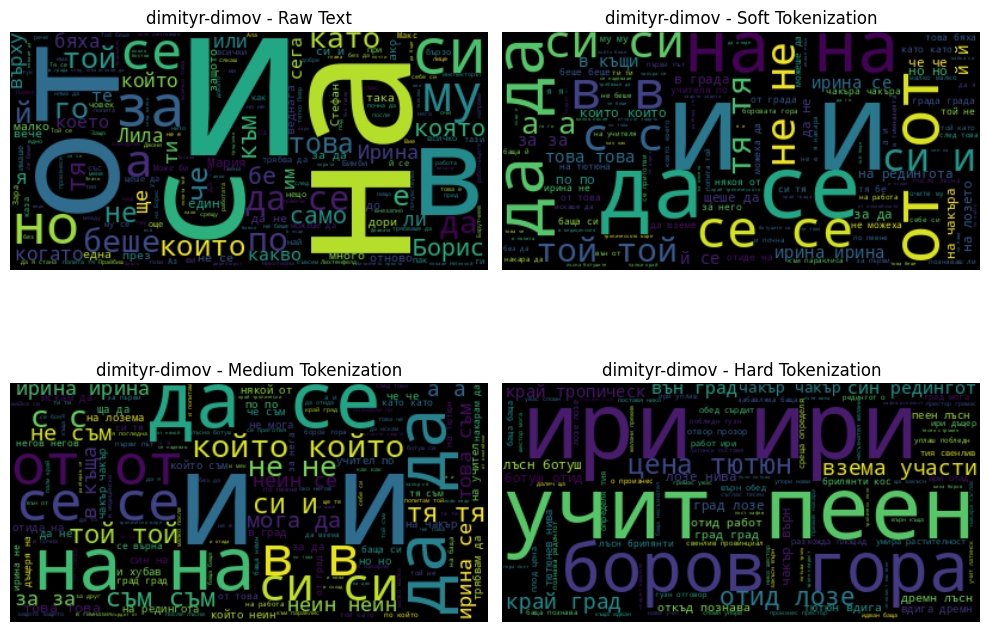

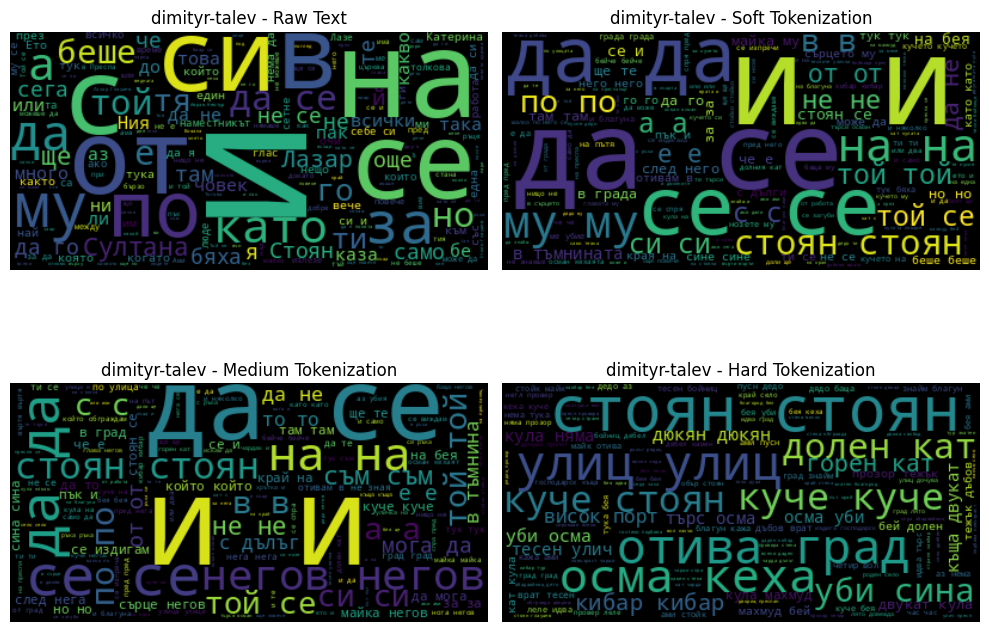

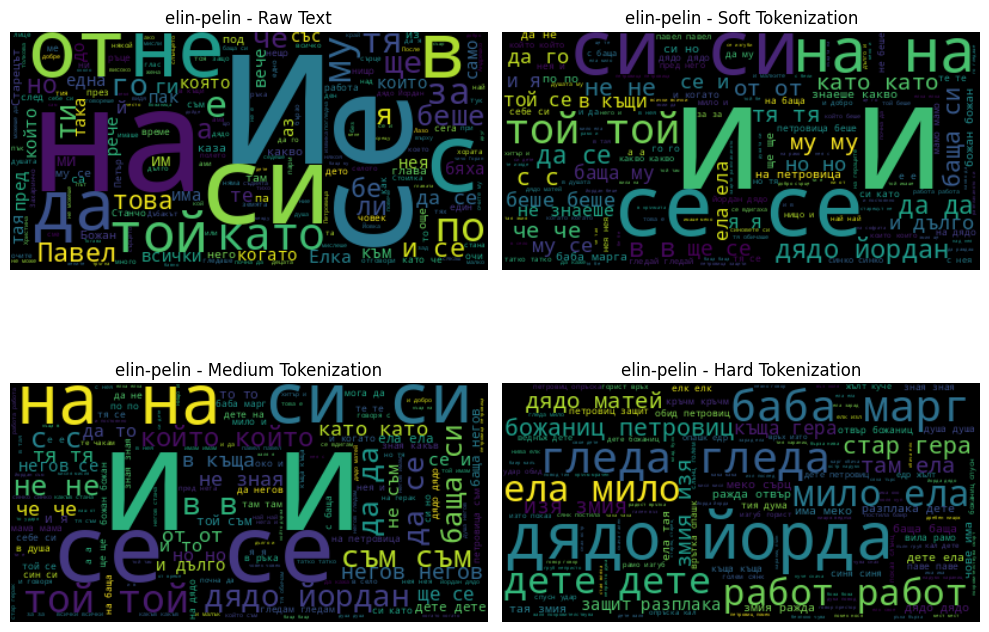

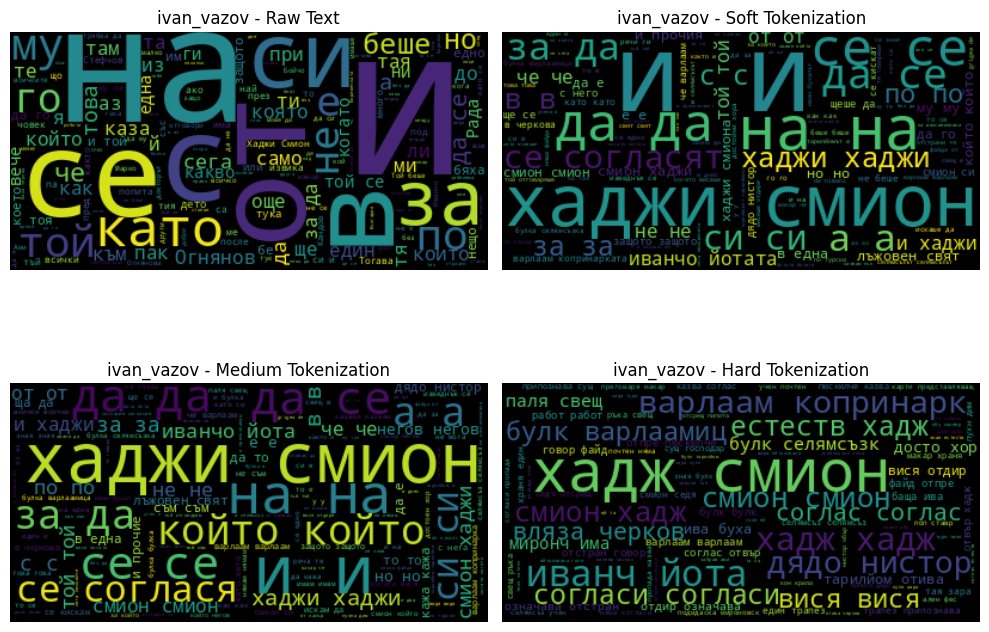

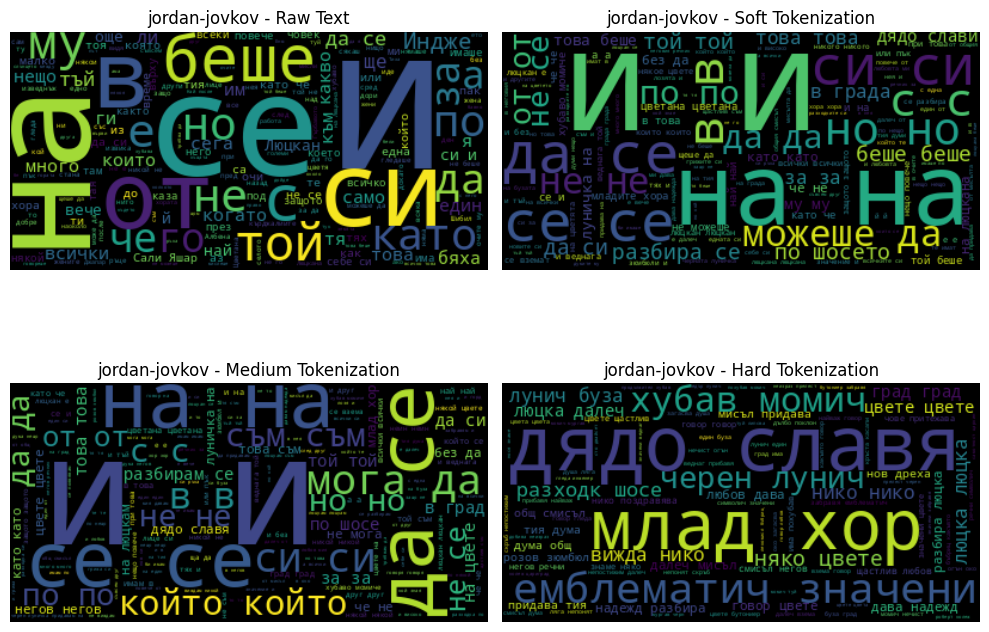

In [65]:
authors = ['aleko-konstantinov', 'dimityr-dimov', 'dimityr-talev', 'elin-pelin', 'ivan_vazov', 'jordan-jovkov']
dfs = [df_group_by_author_raw, df_group_by_author_soft, df_group_by_author_med, df_group_by_author_hard]
meanings = ['Raw Text', 'Soft Tokenization', 'Medium Tokenization', 'Hard Tokenization']

for (i, author) in enumerate(authors):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.ravel()
    
    for ax_i, (df, meaning) in enumerate(zip(dfs, meanings)):
        wordcloud = WordCloud().generate(df.iloc[i]['text'])

        axs[ax_i].set_title(f'{author} - {meaning}')
        axs[ax_i].imshow(wordcloud, interpolation='bilinear')
        axs[ax_i].axis('off')
        
    plt.tight_layout()
    plt.show();